In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame({'Max' : [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25] , 'Min': [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})
df

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32
5,51,35
6,45,31
7,38,28
8,37,21
9,29,19


Text(0, 0.5, 'Temperature(c)')

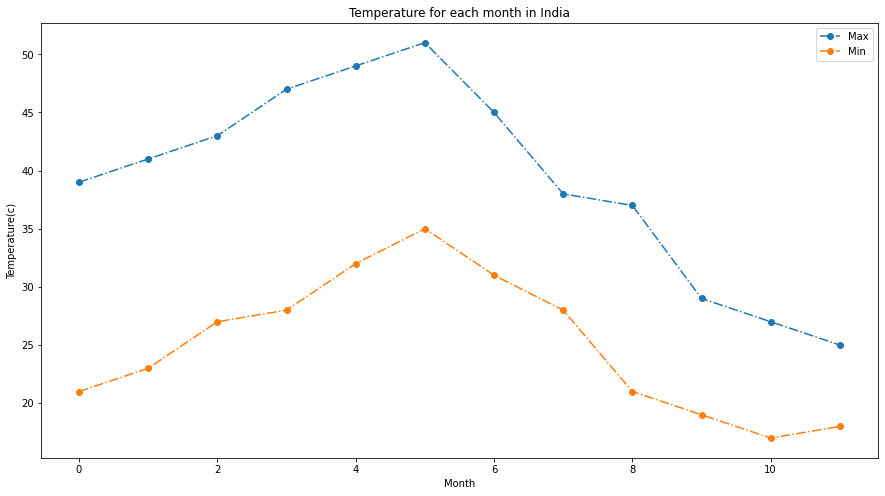

In [15]:
ax = df.plot(figsize=(15,8), title='Temperature for each month in India',marker='o',linestyle='-.')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature(c)')


In [21]:
##Task 1 
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25] 
Min =  [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
from scipy import optimize
import matplotlib.pyplot as plt
months = np.arange(12)
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])

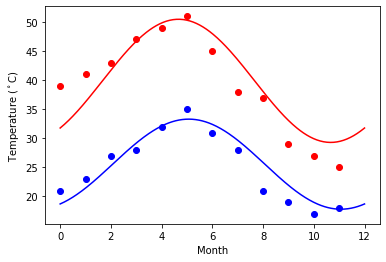

In [22]:
##Task 2
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [25]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [26]:
df.shape

(1310, 14)

In [27]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [28]:
df_sex = df['sex']

In [29]:
df_sex

0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object

<AxesSubplot:ylabel='None'>

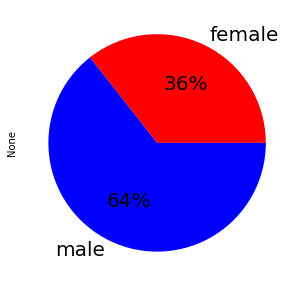

In [36]:
fig, (ax2) = plt.subplots(figsize=(10, 5))
df.groupby('sex').size().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 20},
                                 colors=['red', 'blue'], ax=ax2)

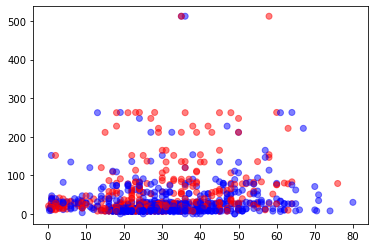

In [50]:
mapping = {'male' : 'blue', 'female' : 'red'}
df = df.dropna(subset=['sex'])
#df.plot.scatter(x = 'fare', y = 'age',alpha=0.5,c=df.sex.astype('category').cat.codes)
plt.scatter(df['age'], df['fare'], alpha=0.5, c=df['sex'].map(mapping))
plt.show()